In [1]:
import pandas as pd
import numpy as np
import re
import requests
from bs4 import BeautifulSoup

In [18]:
url="https://www.flipkart.com/search?q=laptop&sid=6bo%2Cb5g&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_2_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_1_2_na_na_ps&as-pos=1&as-type=RECENT&suggestionId=laptop%7CLaptops&requestId=2ba0a5c4-f421-48d0-a7d0-a6ae0c722614&as-searchtext=la&page=2"

In [19]:
page=requests.get(url)
page

<Response [200]>

In [20]:
soup=BeautifulSoup(page.text) 

In [21]:
p=soup.find_all("div","KzDlHZ") 
p 

[<div class="KzDlHZ">Acer Aspire 3 Backlit Intel Core i5 12th Gen 1235U - (16 GB/512 GB SSD/Windows 11 Home) A324-51 Thin a...</div>,
 <div class="KzDlHZ">Acer Aspire 7 Intel Core i5 13th Gen 13420H - (16 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA G...</div>,
 <div class="KzDlHZ">Acer Predator Helios Neo 16 Intel Core i7 14th Gen 14700HX - (16 GB/1 TB SSD/Windows 11 Home/6 GB Grap...</div>,
 <div class="KzDlHZ">Lenovo IdeaPad Slim 3 Intel Core i5 12th Gen 12450H - (8 GB/512 GB SSD/Windows 11 Home) 15IAH8 Thin an...</div>,
 <div class="KzDlHZ">Acer Aspire 7 Intel Core i5 13th Gen 13420H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA Ge...</div>,
 <div class="KzDlHZ">HP Chromebook MediaTek MT8183 - (4 GB/32 GB EMMC Storage/Chrome OS) 11MK G9 EE Chromebook</div>,
 <div class="KzDlHZ">Lenovo Legion Pro 5 Intel Core i9 14th Gen 14900HX - (32 GB/1 TB SSD/Windows 11 Home/8 GB Graphics/NVI...</div>,
 <div class="KzDlHZ">Lenovo IdeaPad Slim 1 AMD Ryzen 5 Hexa Core 5500U - (8 GB

In [22]:
# Base URL with a placeholder for the page number
base_url = "https://www.flipkart.com/search?q=laptop&sid=6bo%2Cb5g&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_2_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_1_2_na_na_ps&as-pos=1&as-type=RECENT&suggestionId=laptop%7CLaptops&requestId=2ba0a5c4-f421-48d0-a7d0-a6ae0c722614&as-searchtext=la&page={}"

# Total number of pages to scrape
total_pages = 50

# List to store the extracted text
extracted_data = []

# Loop through all the pages
for page in range(1, total_pages + 1):
    url = base_url.format(page)
    print(f"Scraping page {page}...")

    # Send a GET request to the page
    response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
    if response.status_code != 200:
        print(f"Failed to retrieve page {page}")
        continue

    # Parse the HTML content
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find all divs with the class 'KzDlHZ'
    divs = soup.find_all('div', class_='KzDlHZ')

    # Extract text from each div and store it in the list
    for div in divs:
        extracted_data.append(div.get_text(strip=True))

# Display the extracted data
print("Extracted Data:")
for data in extracted_data:
    print(data)


Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...
Scraping page 31...
Scraping page 32...
Scraping page 33...
Scraping page 34...
Scraping page 35...
Scraping page 36...
Scraping page 37...
Scraping page 38...
Scraping page 39...
Scraping page 40...
Scraping page 41...
Scraping page 42...
Scraping page 43...
Scraping page 44...
Scraping page 45...
Scraping page 46...
Scraping page 47...
Scraping page 48...
Scraping page 49...
Scraping page 50...
Extracted

In [23]:
len(extracted_data)

984

In [48]:
brand=[] 
for i in extracted_data:
    brand.append(i.split()[0]) 
len(brand) 

984

In [47]:
model=[] 

for i in extracted_data:
    model.append(" ".join(i.split()[1:8])) 
len(model)


984

In [46]:
ram=[]
for i in extracted_data:
    ram.append(i.split("(")[1].split()[0])
len(ram) 
len(ram)

984

In [45]:
memory = []

for i in extracted_data:
    matches = re.findall(r'\b(256 GB|512 GB|1 TB)\b', i, re.IGNORECASE)

    memory.append(matches)
len(memory)    

984

In [ ]:
len(m)

In [32]:


# Base URL with a placeholder for the page number
base_url = "https://www.flipkart.com/search?q=laptop&sid=6bo%2Cb5g&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_2_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_1_2_na_na_ps&as-pos=1&as-type=RECENT&suggestionId=laptop%7CLaptops&requestId=2ba0a5c4-f421-48d0-a7d0-a6ae0c722614&as-searchtext=la&page={}"

# Total number of pages to scrape
total_pages = 50

# List to store the extracted text
extracted_data1 = []

# Loop through all the pages
for page in range(1, total_pages + 1):
    url = base_url.format(page)
    print(f"Scraping page {page}...")

    # Send a GET request to the page
    response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
    if response.status_code != 200:
        print(f"Failed to retrieve page {page}")
        continue

    # Parse the HTML content
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find all divs with the class 'KzDlHZ'
    divs = soup.find_all('div',class_='XQDdHH')

    # Extract text from each div and store it in the list
    for div in divs:
        extracted_data1.append(div.get_text(strip=True))

# Display the extracted data
print("Extracted Data:")
for data in extracted_data1:
    print(data)

Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...
Scraping page 31...
Scraping page 32...
Scraping page 33...
Scraping page 34...
Scraping page 35...
Scraping page 36...
Scraping page 37...
Scraping page 38...
Scraping page 39...
Scraping page 40...
Scraping page 41...
Scraping page 42...
Scraping page 43...
Scraping page 44...
Scraping page 45...
Scraping page 46...
Scraping page 47...
Scraping page 48...
Scraping page 49...
Scraping page 50...
Extracted

In [39]:
len(extracted_data1)

1539

In [40]:
ratings=[]

for i in range(984):
    ratings.append(extracted_data1[i])
len(ratings)    

984

In [34]:
import requests
from bs4 import BeautifulSoup

# Base URL with a placeholder for the page number
base_url = "https://www.flipkart.com/search?q=laptop&sid=6bo%2Cb5g&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_2_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_1_2_na_na_ps&as-pos=1&as-type=RECENT&suggestionId=laptop%7CLaptops&requestId=2ba0a5c4-f421-48d0-a7d0-a6ae0c722614&as-searchtext=la&page={}"

# Total number of pages to scrape
total_pages = 50

# List to store the extracted text
price = []

# Loop through all the pages
for page in range(1, total_pages + 1):
    url = base_url.format(page)
    print(f"Scraping page {page}...")

    # Send a GET request to the page
    response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
    if response.status_code != 200:
        print(f"Failed to retrieve page {page}")
        continue

    # Parse the HTML content
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find all divs with the class 'KzDlHZ'
    divs = soup.find_all('div','Nx9bqj _4b5DiR')

    # Extract text from each div and store it in the list
    for div in divs:
        price.append(div.get_text(strip=True))

# Display the extracted data
print("Extracted Data:")
for data in price:
    print(data)
price

Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...
Scraping page 31...
Scraping page 32...
Scraping page 33...
Scraping page 34...
Scraping page 35...
Scraping page 36...
Scraping page 37...
Scraping page 38...
Scraping page 39...
Scraping page 40...
Scraping page 41...
Scraping page 42...
Scraping page 43...
Scraping page 44...
Scraping page 45...
Scraping page 46...
Scraping page 47...
Scraping page 48...
Scraping page 49...
Scraping page 50...
Extracted

['₹1,14,990',
 '₹46,990',
 '₹74,990',
 '₹36,990',
 '₹29,699',
 '₹2,05,290',
 '₹79,990',
 '₹85,990',
 '₹47,680',
 '₹60,990',
 '₹33,990',
 '₹96,990',
 '₹54,990',
 '₹66,990',
 '₹71,990',
 '₹37,999',
 '₹16,990',
 '₹16,990',
 '₹45,990',
 '₹56,240',
 '₹76,990',
 '₹57,990',
 '₹39,990',
 '₹62,990',
 '₹45,990',
 '₹35,990',
 '₹1,14,990',
 '₹46,990',
 '₹34,990',
 '₹31,990',
 '₹2,05,290',
 '₹96,990',
 '₹67,990',
 '₹38,360',
 '₹42,990',
 '₹41,990',
 '₹33,990',
 '₹19,990',
 '₹37,990',
 '₹56,990',
 '₹16,990',
 '₹16,990',
 '₹57,990',
 '₹46,590',
 '₹75,990',
 '₹53,990',
 '₹76,990',
 '₹57,990',
 '₹37,990',
 '₹46,590',
 '₹1,14,990',
 '₹46,990',
 '₹41,990',
 '₹75,990',
 '₹57,990',
 '₹56,990',
 '₹2,05,290',
 '₹33,990',
 '₹38,360',
 '₹16,990',
 '₹16,990',
 '₹96,990',
 '₹74,990',
 '₹31,320',
 '₹69,990',
 '₹53,990',
 '₹76,990',
 '₹57,990',
 '₹46,990',
 '₹50,990',
 '₹18,990',
 '₹47,680',
 '₹31,990',
 '₹19,990',
 '₹41,970',
 '₹9,990',
 '₹34,990',
 '₹1,14,990',
 '₹18,990',
 '₹73,990',
 '₹46,990',
 '₹2,05,290',
 

In [49]:
len(price)

984

In [42]:

# Base URL with a placeholder for the page number
base_url = "https://www.flipkart.com/search?q=laptop&sid=6bo%2Cb5g&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_2_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_1_2_na_na_ps&as-pos=1&as-type=RECENT&suggestionId=laptop%7CLaptops&requestId=2ba0a5c4-f421-48d0-a7d0-a6ae0c722614&as-searchtext=la&page={}"

# Total number of pages to scrape
total_pages = 50

# List to store the extracted text
screensize = []

# Loop through all the pages
for page in range(1, total_pages + 1):
    url = base_url.format(page)
    print(f"Scraping page {page}...")

    # Send a GET request to the page
    response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
    if response.status_code != 200:
        print(f"Failed to retrieve page {page}")
        continue

    # Parse the HTML content
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find all divs with the class 'KzDlHZ'
    divs = soup.find_all('li','J+igdf')

    # Extract text from each div and store it in the list
    for div in divs:
        screensize.append(div.get_text(strip=True))

# Display the extracted data
print("Extracted Data:")
for data in screensize:
    print(data)
screensize

Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...
Scraping page 31...
Scraping page 32...
Scraping page 33...
Scraping page 34...
Scraping page 35...
Scraping page 36...
Scraping page 37...
Scraping page 38...
Scraping page 39...
Scraping page 40...
Scraping page 41...
Scraping page 42...
Scraping page 43...
Scraping page 44...
Scraping page 45...
Scraping page 46...
Scraping page 47...
Scraping page 48...
Scraping page 49...
Scraping page 50...
Extracted

['Intel Core i3 Processor (12th Gen)',
 '8 GB DDR4 RAM',
 'Windows 11 Operating System',
 '512 GB SSD',
 '39.62 cm (15.6 inch) Display',
 '1 Year Onsite Warranty',
 'Intel Core i7 Processor (14th Gen)',
 '16 GB DDR5 RAM',
 'Windows 11 Operating System',
 '1 TB SSD',
 '40.64 cm (16 Inch) Display',
 '1 Year Carry-in Warranty',
 'Intel Core i5 Processor (12th Gen)',
 '16 GB DDR4 RAM',
 '64 bit Windows 11 Operating System',
 '512 GB SSD',
 '35.81 cm (14.1 inch) Display',
 'Windows 11',
 '1 Year Onsite Warranty',
 'AMD Ryzen 3 Quad Core Processor',
 '8 GB DDR5 RAM',
 'Windows 11 Home Operating System',
 '512 GB SSD',
 '39.62 cm (15.6 inch) Display',
 'Microsoft Office Home & Student 2021',
 '1 Year Onsite Hardware Service',
 'Apple M2 Processor',
 '16 GB Unified Memory RAM',
 'Mac OS Operating System',
 '256 GB SSD',
 '34.54 cm (13.6 Inch) Display',
 'Built-in Apps: App Store, Books, Calendar, Contacts, FaceTime, Find My, Freeform, GarageBand, Home, iMovie, Keynote, Mail, Maps, Messages, Mu

In [72]:
screen_size=[]
for i in screensize:
    b = re.findall(r'\b[\d.]+\s*(?:cm|inch)\b', i, re.IGNORECASE)
    if len(b)>0:
     screen_size.append(b)
len(screen_size)

1020

In [73]:
(screen_size)

[['39.62 cm', '15.6 inch'],
 ['40.64 cm', '16 Inch'],
 ['35.81 cm', '14.1 inch'],
 ['39.62 cm', '15.6 inch'],
 ['34.54 cm', '13.6 Inch'],
 ['39.62 cm', '15.6 Inch'],
 ['39.62 cm', '15.6 inch'],
 ['34.54 cm', '13.6 Inch'],
 ['39.62 cm', '15.6 Inch'],
 ['35.56 cm', '14 Inch'],
 ['40.64 cm', '16 Inch'],
 ['39.62 cm', '15.6 inch'],
 ['38.1 cm', '15 inch'],
 ['40.64 cm', '16 inch'],
 ['35.56 cm', '14 Inch'],
 ['35.56 cm', '14 Inch'],
 ['39.62 cm', '15.6 Inch'],
 ['35.81 cm', '14.1 inch'],
 ['34.54 cm', '13.6 Inch'],
 ['39.62 cm', '15.6 Inch'],
 ['39.62 cm', '15.6 inch'],
 ['14.1 inch'],
 ['35.81 cm', '14.1 inch'],
 ['39.62 cm', '15.6 Inch'],
 ['34.54 cm', '13.6 Inch'],
 ['35.56 cm', '14 Inch'],
 ['39.62 cm', '15.6 Inch'],
 ['40.64 cm', '16 Inch'],
 ['39.62 cm', '15.6 Inch'],
 ['39.62 cm', '15.6 Inch'],
 ['29.46 cm', '11.6 Inch'],
 ['40.64 cm', '16 Inch'],
 ['39.62 cm', '15.6 inch'],
 ['39.62 cm', '15.6 Inch'],
 ['39.62 cm', '15.6 Inch'],
 ['34.54 cm', '13.6 Inch'],
 ['33.02 cm', '13 Inch'],

In [77]:
target_length=984

screen_size = screen_size[:target_length]
len(screen_size)

984

In [67]:
screen_size#[1019]

['35.56 cm', '14 inch']

1043

In [71]:
for i in range(1020-985):
    print(i)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34


In [78]:
print(len(model))
print(len(brand)) 
print(len(memory))
print(len(ram))
print(len(ratings))
print(len(screen_size))
print(len(price))

984
984
984
984
984
984
984


In [ ]:
len(screen_size)

In [16]:
984-961

23

In [118]:
 df=pd.DataFrame({"Brand":brand,"Model":model,"ram":ram,"Memory":memory,"Rating":ratings,"ScreenSize":screen_size
               ,"Price":price}) 
df.head()

,Brand,Model,ram,Memory,Rating,ScreenSize,Price
0,Lenovo,IdeaPad Slim 1 AMD Ryzen 5 Hexa,8,[512 GB],4.2,"[39.62 cm, 15.6 inch]","₹1,14,990"
1,Acer,Predator Helios Neo 16 Intel Core i7,16,[1 TB],4.3,"[40.64 cm, 16 Inch]","₹46,990"
2,Apple,MacBook AIR Apple M2 - (8 GB/256,8,[256 GB],4.1,"[35.81 cm, 14.1 inch]","₹74,990"
3,Lenovo,V14 Intel Core i5 12th Gen 1235U,16,[512 GB],4.3,"[39.62 cm, 15.6 inch]","₹36,990"
4,DELL,15 AMD Ryzen 3 Quad Core 7320U,8,[512 GB],4.7,"[34.54 cm, 13.6 Inch]","₹29,699"


In [119]:
df.shape

(984, 7)

In [81]:
df.to_csv("data_collection_file.csv")

In [120]:
df.tail()

,Brand,Model,ram,Memory,Rating,ScreenSize,Price
979,DELL,Inspiron 15 AMD Ryzen 5 Quad Core,8,[512 GB],5,"[39.62 cm, 15.6 inch]","₹39,490"
980,HP,OMEN Intel Core i7 14th Gen 14650HX,16,[1 TB],5,"[39.62 cm, 15.6 Inch]","₹57,990"
981,Lenovo,Legion 5 Intel Core i7 13th Gen,24,[512 GB],4,"[39.62 cm, 15.6 inch]","₹34,990"
982,DELL,Vostro Intel Core i5 11th Gen 1135G7,8,[512 GB],5,"[34.54 cm, 13.6 Inch]","₹48,990"
983,ASUS,Zenbook 14X OLED Space Edition Touchscreen Intel,32,[],5,"[39.62 cm, 15.6 inch]","₹65,990"


In [121]:
df.sample(5)

,Brand,Model,ram,Memory,Rating,ScreenSize,Price
879,ASUS,Vivobook 15 Intel Core 5 120U -,16,[512 GB],4.3,"[39.62 cm, 15.6 Inch]","₹35,380"
7,Apple,MacBook AIR Apple M2 - (8 GB/512,8,[512 GB],4.7,"[34.54 cm, 13.6 Inch]","₹85,990"
620,Lenovo,IdeaPad Slim 5 Intel Core i5 12th,16,[512 GB],4.3,"[35.56 cm, 14 Inch]","₹16,990"
141,Lenovo,IdeaPad Slim 5 Intel Core i5 12th,16,[512 GB],4.4,[14.1 inch],"₹34,990"
234,MICROSOFT,Laptop Go 3 Intel Core i5 12th,16,[256 GB],4.3,"[35.56 cm, 14 inch]","₹83,990"


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Brand       984 non-null    object
 1   Model       984 non-null    object
 2   ram         984 non-null    object
 3   Memory      984 non-null    object
 4   Rating      984 non-null    object
 5   ScreenSize  984 non-null    object
 6   Price       984 non-null    object
dtypes: object(7)
memory usage: 53.9+ KB


In [125]:
# Remove square brackets by converting lists to strings
columns_to_clean = ["Memory", "ScreenSize"]
for col in columns_to_clean:
    df[col] = df[col].apply(lambda x: ", ".join(x) if isinstance(x, list) else x)

In [126]:
df

,Brand,Model,ram,Memory,Rating,ScreenSize,Price
0,Lenovo,IdeaPad Slim 1 AMD Ryzen 5 Hexa,8,512 GB,4.2,"39.62 cm, 15.6 inch","₹1,14,990"
1,Acer,Predator Helios Neo 16 Intel Core i7,16,1 TB,4.3,"40.64 cm, 16 Inch","₹46,990"
2,Apple,MacBook AIR Apple M2 - (8 GB/256,8,256 GB,4.1,"35.81 cm, 14.1 inch","₹74,990"
3,Lenovo,V14 Intel Core i5 12th Gen 1235U,16,512 GB,4.3,"39.62 cm, 15.6 inch","₹36,990"
4,DELL,15 AMD Ryzen 3 Quad Core 7320U,8,512 GB,4.7,"34.54 cm, 13.6 Inch","₹29,699"
...,...,...,...,...,...,...,...
979,DELL,Inspiron 15 AMD Ryzen 5 Quad Core,8,512 GB,5,"39.62 cm, 15.6 inch","₹39,490"
980,HP,OMEN Intel Core i7 14th Gen 14650HX,16,1 TB,5,"39.62 cm, 15.6 Inch","₹57,990"
981,Lenovo,Legion 5 Intel Core i7 13th Gen,24,512 GB,4,"39.62 cm, 15.6 inch","₹34,990"
982,DELL,Vostro Intel Core i5 11th Gen 1135G7,8,512 GB,5,"34.54 cm, 13.6 Inch","₹48,990"


In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

In [131]:
df.duplicated().sum()

33

In [135]:
df.drop_duplicates(inplace=True)

In [136]:
df.duplicated().sum()

0

In [138]:
df.shape

(951, 7)

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

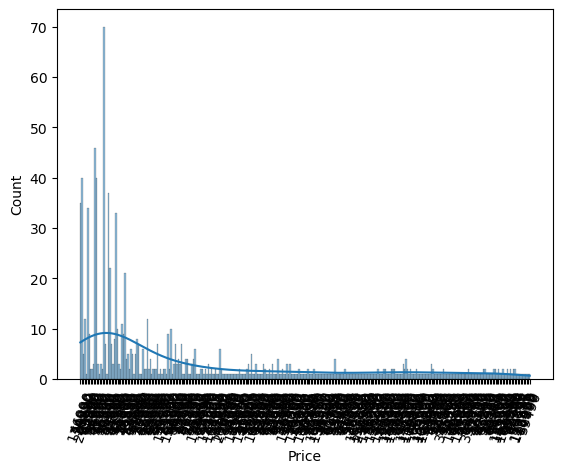

In [171]:
sns.histplot(x=df['Price'],kde=True)
plt.xticks(rotation=70)
plt.show()

<Axes: xlabel='Price', ylabel='Count'>

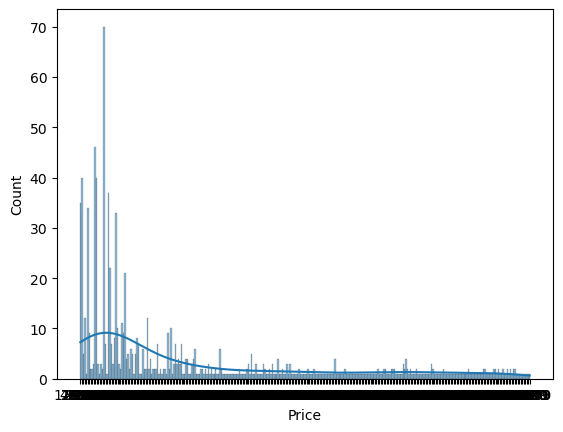

In [190]:
sns.histplot(df['Price'],kde=True)

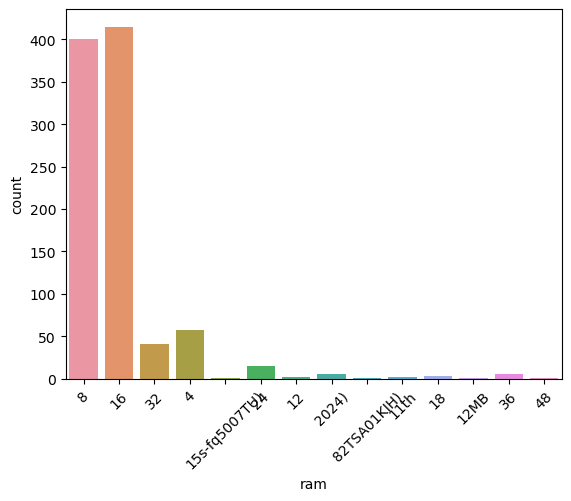

In [145]:
sns.countplot(df,x=df['ram'])
plt.xticks(rotation=45)
plt.show()

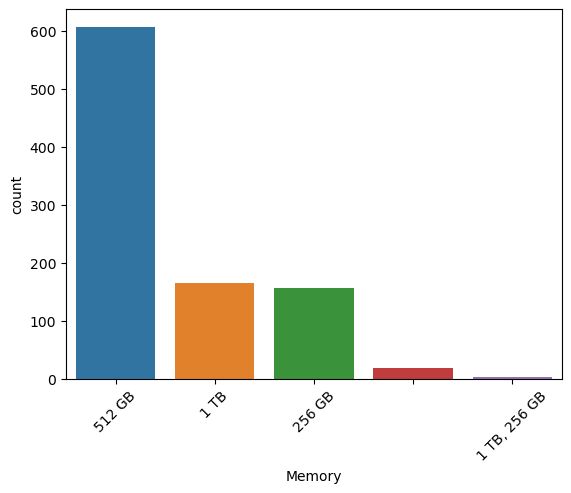

In [146]:
sns.countplot(df,x=df['Memory'])
plt.xticks(rotation=45)
plt.show()

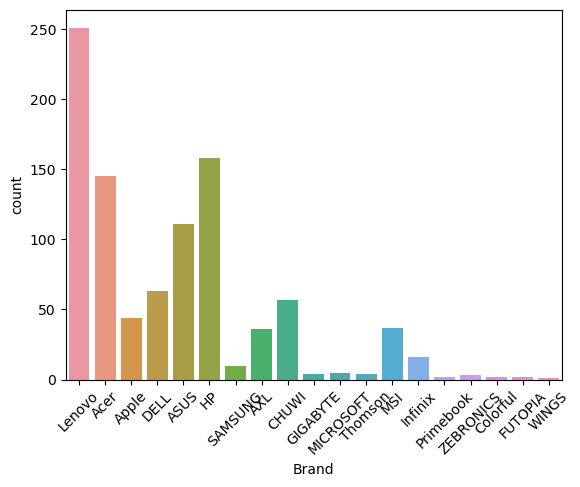

In [162]:
sns.countplot(x=df['Brand'])
plt.xticks(rotation=45)
plt.show()

<Axes: >

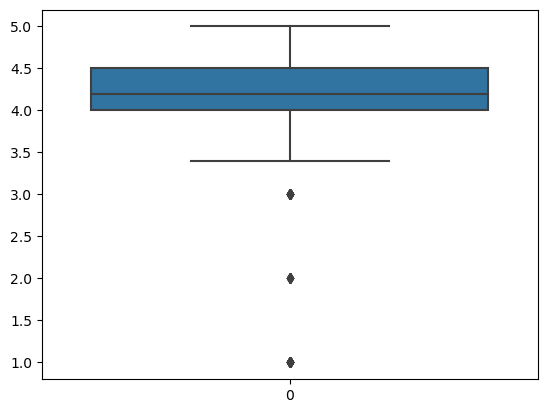

In [148]:
sns.boxplot(df['Rating'])

In [153]:
df['Price'] = df['Price'].str.replace('₹', '', regex=False)  
df['Price'] = df['Price'].str.replace(',', '', regex=False)

<Axes: >

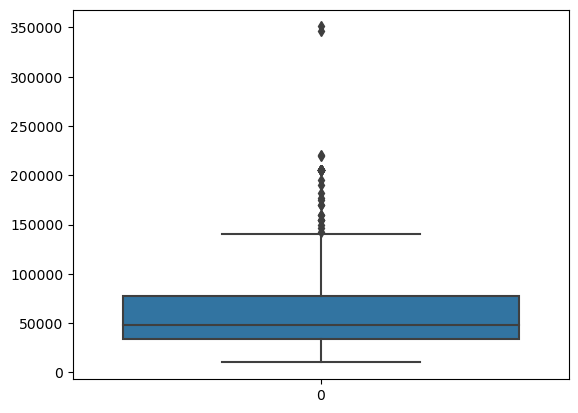

In [154]:
sns.boxplot(df['Price'])

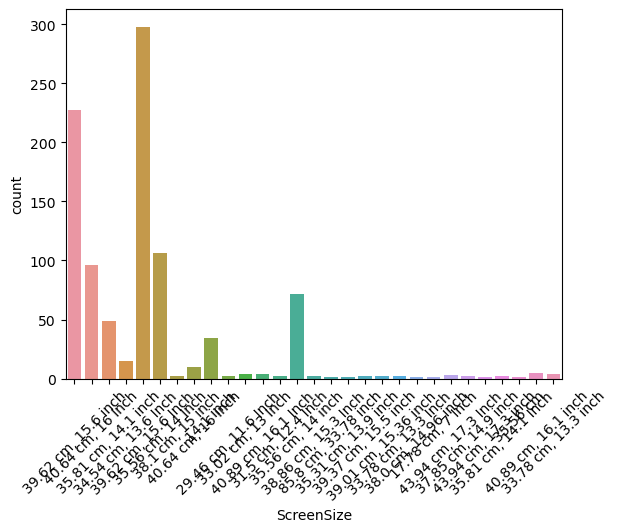

In [166]:
sns.countplot(x=df['ScreenSize'])
plt.xticks(rotation=45)
plt.show()

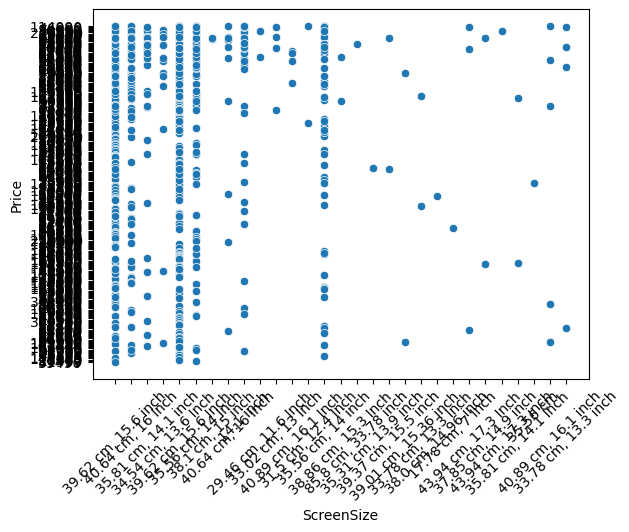

In [181]:
sns.scatterplot(df,x=df["ScreenSize"],y=df["Price"])
plt.xticks(rotation=45)
plt.show() 